In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# Read the City and Ride Data
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
# Merge our two data frames together
# both dataframes had 120 cities so I used an innerjoin 
# to make sure the only data that stays is data with all columns filled
pyber_data = pd.merge(city_data_to_load, ride_data_to_load, on="city")

# Display the data table for preview
# city is still 120 unique values
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# isolate the rural data and group it by type and city
rural = pyber_data.loc[pyber_data["type"] == "Rural", :]
rural = rural.groupby(["type", "city"])
# preview the rural data
#rural.count().head()

# isolate the suburban data and group it by type and city
suburban = pyber_data.loc[pyber_data["type"] == "Suburban", :]
suburban = suburban.groupby(["type", "city"])
# preview the suburban data
#suburban.count().head()

# isolate the urban data and group it by type and city
urban = pyber_data.loc[pyber_data["type"] == "Urban", :]
urban = urban.groupby(["type", "city"])
#preview the urban data
#urban.count().head()

## Bubble Plot of Ride Sharing Data

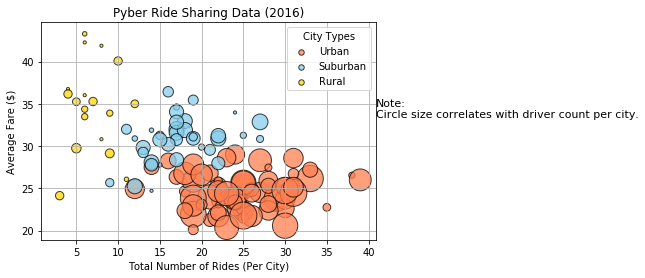

In [6]:
# Obtain the x and y coordinates for each of the three city types
Rrides = rural.count()["ride_id"]
Ravg_fare = rural.mean()["fare"]
Rdriver_count = rural.mean()["driver_count"]

Srides = suburban.count()["ride_id"]
Savg_fare = suburban.mean()["fare"]
Sdriver_count = suburban.mean()["driver_count"]

Urides = urban.count()["ride_id"]
Uavg_fare = urban.mean()["fare"]
Udriver_count = urban.mean()["driver_count"]

#driver_count = sorted_pyber_data.count()["driver_count"]



# Build the scatter plots for each city types
Urban_plot = plt.scatter(Urides, Uavg_fare, marker="o", label = "Urban", facecolors="coral", alpha = .75, edgecolors="black", s=Udriver_count*10)
Suburban_plot = plt.scatter(Srides, Savg_fare, marker="o", label = "Suburban", facecolors="skyblue", alpha = .75, edgecolors="black", s=Sdriver_count*10)
Rural_plot = plt.scatter(Rrides, Ravg_fare, marker="o", label = "Rural", facecolors="gold", alpha = .75, edgecolors="black", s=Rdriver_count*10)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(title = "City Types", loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.text(.9, .55, "Note:" + "\n" + "Circle size correlates with driver count per city.", fontsize=11, transform=plt.gcf().transFigure)


# Save Figure
plt.savefig("Images/PyberRideSharingData2016.png", bbox_inches="tight")
plt.show()

## Total Fares by City Type

In [8]:
# isolate the rural data and group it by type and city
rural2 = pyber_data.loc[pyber_data["type"] == "Rural", :]
sub2 = pyber_data.loc[pyber_data["type"] == "Suburban", :]
urban2 = pyber_data.loc[pyber_data["type"] == "Urban", :]

# Calculate Type Percents
ruralp = rural2.sum()["fare"] / (rural2.sum()["fare"] + sub2.sum()["fare"] + urban2.sum()["fare"])*100
subp = sub2.sum()["fare"] / (rural2.sum()["fare"] + sub2.sum()["fare"] + urban2.sum()["fare"])*100
urbanp = urban2.sum()["fare"] / (rural2.sum()["fare"] + sub2.sum()["fare"] + urban2.sum()["fare"])*100

# print to check the percentages
#print(ruralp)
#print(subp)
#print(urbanp)

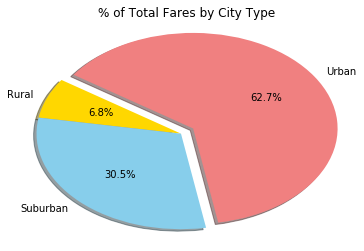

In [10]:
# Build Pie Chart
Types = ["Urban", "Rural", "Suburban"]
pies = [urbanp, ruralp, subp]

# changed coral to lightcoral to better match the picture color
colors = ["lightcoral", "gold", "skyblue"]
explode = [.1, 0, 0]

plt.pie(pies, explode=explode, labels=Types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("auto")


# Save Figure
plt.savefig("Images/%OfTotalFaresByCityType.png", bbox_inches="tight")
plt.show()

## Total Rides by City Type

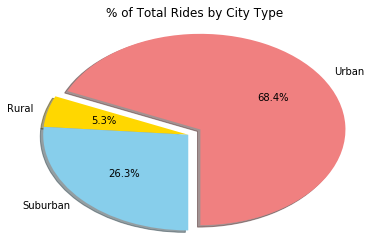

In [20]:
# Calculate Ride Percents
ruralr_count = len(rural2["ride_id"]) / (len(rural2["ride_id"]) + len(sub2["ride_id"]) + len(urban2["ride_id"]))*100
subr_count = len(sub2["ride_id"]) / (len(rural2["ride_id"]) + len(sub2["ride_id"]) + len(urban2["ride_id"]))*100
urbanr_count = len(urban2["ride_id"]) / (len(rural2["ride_id"]) + len(sub2["ride_id"]) + len(urban2["ride_id"]))*100

# print to check percentages
#print(ruralr_count)
#print(subr_count)
#print(urbanr_count)

# Build Pie Chart
Types = ["Urban", "Rural", "Suburban"]
pies = [urbanr_count, ruralr_count, subr_count]

# changed coral to lightcoral to better match the picture color
colors = ["lightcoral", "gold", "skyblue"]
explode = [.1, 0, 0]

plt.pie(pies, explode=explode, labels=Types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Rides by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("auto")


# Save Figure
plt.savefig("Images/%OfTotalRidesByCityType.png", bbox_inches="tight")
plt.show()

## Total Drivers by City Type

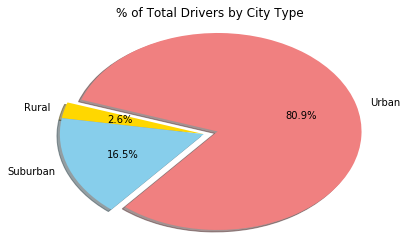

In [37]:
# Calculate Driver Percents
# remove duplicate city rows to add up all the drivers
rural3 = rural2.drop_duplicates(subset="city")
sub3 = sub2.drop_duplicates(subset="city")
urban3 = urban2.drop_duplicates(subset="city")

rurald = rural3.sum()["driver_count"] / (rural3.sum()["driver_count"] + sub3.sum()["driver_count"] + urban3.sum()["driver_count"])*100
subd = sub3.sum()["driver_count"] / (rural3.sum()["driver_count"] + sub3.sum()["driver_count"] + urban3.sum()["driver_count"])*100
urband = urban3.sum()["driver_count"] / (rural3.sum()["driver_count"] + sub3.sum()["driver_count"] + urban3.sum()["driver_count"])*100

# preview totals
#print(rurald)
#print(subd)
#print(urband)

# Build Pie Chart
Types = ["Urban", "Rural", "Suburban"]
pies = [urband, rurald, subd]

# changed coral to lightcoral to better match the picture color
colors = ["lightcoral", "gold", "skyblue"]
explode = [.1, 0, 0]

plt.pie(pies, explode=explode, labels=Types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=230)
plt.title("% of Total Drivers by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("auto")


# Save Figure
plt.savefig("Images/%OfTotalDriversByCityType.png", bbox_inches="tight")
plt.show()